In [1]:
# import libraries
from cil.framework import BlockDataContainer
from cil.optimisation.functions import L2NormSquared, MixedL21Norm, OperatorCompositionFunction
from cil.optimisation.operators import GradientOperator, BlockOperator, IdentityOperator
from cil.optimisation.algorithms import PDHG, CGLS, FISTA
from cil.utilities.dataexample import TestData
from cil.utilities.display import plotter2D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


import matplotlib.pyplot as plt
import numpy as np

import os, sys

In [6]:
def my_function(x):
    display(x)

# display(widget)
# widget = interactive(func, arg1=val1, arg2=val2)
# display(widget)

d = interactive(my_function, x=4)
display(d)

interactive(children=(IntSlider(value=4, description='x', max=12, min=-4), Output()), _dom_classes=('widget-in…

In [5]:
d

interactive(children=(IntSlider(value=4, description='x', max=12, min=-4), Output()), _dom_classes=('widget-in…

In [ ]:
select_image = widgets.Dropdown(
    options=['CGLS','FISTA','PDHG'],
    value=None,
    description='Algorithm:',
)

test_algo

# Select an image from our CIL-Library

In [2]:
def select_image(sigma):
    
    loader = TestData(data_dir=os.path.join(sys.prefix, 'share','cil'))
    data = loader.load(TestData.SHAPES)
    ig = data.geometry    

    noisy_data = TestData.random_noise(data, mode = 'gaussian', seed = 10, var = sigma)
    
    plotter2D([data,noisy_data])
    
    return data, noisy_data
    
images = interactive(select_image, sigma=(0.001,0.01,0.001), name="level of noise")  

In [51]:
def select_algorithm(test_algo):
    
    sigma = 0.001
    
    loader = TestData(data_dir=os.path.join(sys.prefix, 'share','cil'))
    data = loader.load(TestData.SHAPES)
    ig = data.geometry    

    noisy_data = TestData.random_noise(data, mode = 'gaussian', seed = 10, var = sigma)    
    
#     plotter2D([data,noisy_data])
    
    # Regularisation parameter fo the Total variation term
#     alpha = 5
    
#     alpha = widgets.FloatLogSlider(
#         value=10,
#         base=10,
#         min=-10, # max exponent of base
#         max=10, # min exponent of base
#         step=0.2, # exponent step
#         description='Log Slider'
#     )    

#     print(alpha)

    alpha = 1.

    algorithm = test_algo.value
    
    test_algo = widgets.Dropdown(
    options=['CGLS','FISTA','PDHG'],
    value=None,
    description='Algorithm:',
    )
    
    if algorithm == 'CGLS':

        # Setup CGLS algorithm with BlockFramework
        Grad = alpha * GradientOperator(ig)
        K = BlockOperator(IdentityOperator(ig), alpha * GradientOperator(ig))
        b = BlockDataContainer(noisy_data, Grad.range.allocate())

        algo = CGLS(initial = ig.allocate(), operator = K, data = b,
                      max_iteration = 500, update_objective_interval = 100, tolerance=1e-12)
        algo.run()

    elif algorithm == 'FISTA':    

        # Setup FISTA algorithm 
        G = 0.5 * L2NormSquared(b=noisy_data)
        F = OperatorCompositionFunction(alpha * L2NormSquared(), GradientOperator(ig))

        algo = FISTA(initial = ig.allocate(), f = F, g = G, 
                      max_iteration = 500, update_objective_interval = 100)
        algo.run()   

    elif algorithm == 'PDHG':

        # Setup PDHG algorithm
        F = alpha * L2NormSquared()
        G = 0.5 * L2NormSquared(b=noisy_data)
        K = GradientOperator(ig)

        # Compute operator Norm
        normK = K.norm()

        # Primal & dual stepsizes
        sigma = 1.
        tau = 1/(sigma*normK**2)

        # Setup and run the PDHG algorithm
        algo = PDHG(f=F, g=G, operator=K, tau=tau, sigma=sigma,
                    max_iteration = 500, update_objective_interval = 100)
        algo.run(verbose=2)

    else:
        pass      
    
    
    plotter2D([data, noisy_data, algo.solution, (algo.solution-data).abs()],
          titles=["Ground Truth", 
                  "Corrupted Data (Gaussian)", 
                  "Tikhonov restoration: alpha = {}".format(alpha),
                  "Absolute Difference"])
       

In [52]:
test_algo = widgets.Dropdown(
    options=['CGLS','FISTA','PDHG'],
    value=None,
    description='Algorithm:',
)

test_algo

Dropdown(description='Algorithm:', options=('CGLS', 'FISTA', 'PDHG'), value=None)

In [56]:
test_algo.value

'CGLS'

Initialised GradientOperator with C backend running with  20  threads
Initialised GradientOperator with C backend running with  20  threads
CGLS setting up
CGLS configured
     Iter   Max Iter     Time/Iter            Objective
                               [s]                     
        0        500         0.004          2.06978e+04
      100        500         0.002          2.83777e+02
      200        500         0.002          2.83777e+02
      300        500         0.002          2.83777e+02
      400        500         0.002          2.83777e+02
      500        500         0.002          2.83777e+02
-------------------------------------------------------
      500        500         0.002          2.83777e+02
Stop criterion has been reached.



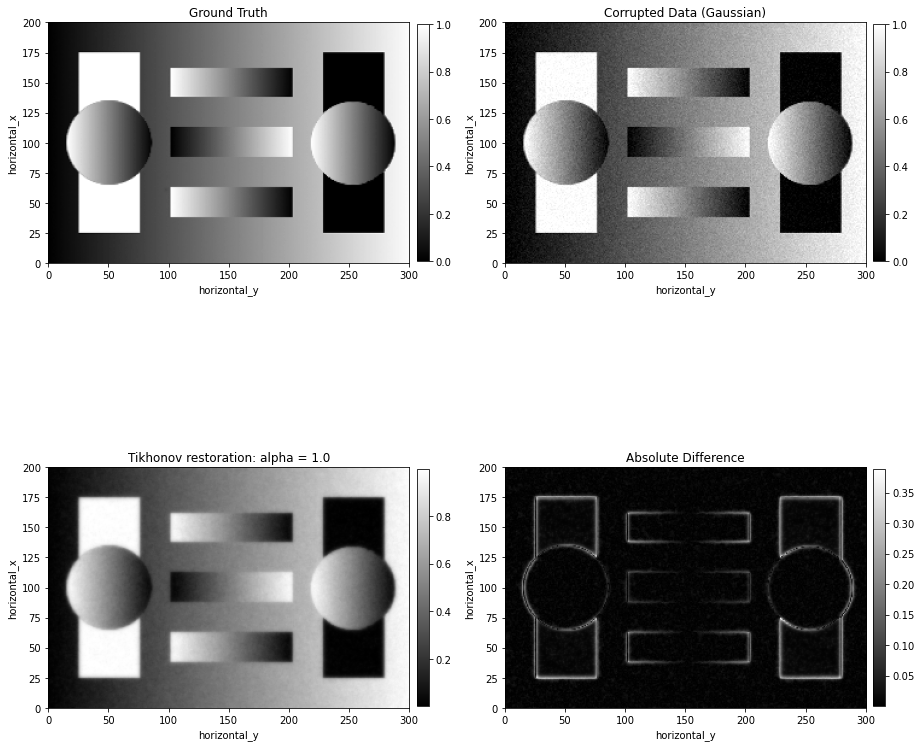

In [57]:
run_algorithm = interact(select_algorithm(test_algo))  

In [30]:
algorithm = widgets.Dropdown(
    options=['CGLS','FISTA','PDHG'],
    value='CGLS',
    description='Algorithm:',
)

# def on_change(change):
#     if change['type'] == 'change' and change['name'] == 'value':
#         print("changed to %s" % change['new'])

# w.observe(on_change)

display(algorithm)

Dropdown(description='Algorithm:', options=('CGLS', 'FISTA', 'PDHG'), value='CGLS')

In [32]:
algorithm.value

'FISTA'

In [20]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
# interactive_plot

In [2]:
# Load an image from the CIL gallery. 
loader = TestData(data_dir=os.path.join(sys.prefix, 'share','cil'))
data = loader.load(TestData.SHAPES)
ig = data.geometry

In [3]:
# Add gaussian noise
noisy_data = TestData.random_noise(data, mode = 'gaussian', seed = 10, var = 0.005)

In [24]:
# Select an algorithm to solve the Tikhonov regularisation
algorithm = input("Select algorithm: CGLS (0) or FISTA (1) or PDHG (2)")

Select algorithm: CGLS (0) or FISTA (1) or PDHG (2) 2


In [25]:
# Regularisation parameter fo the Total variation term
alpha = 5

if algorithm == '0':
    
    # Setup CGLS algorithm with BlockFramework
    Grad = alpha * GradientOperator(ig)
    K = BlockOperator(IdentityOperator(ig), alpha * GradientOperator(ig))
    b = BlockDataContainer(noisy_data, Grad.range.allocate())

    algo = CGLS(initial = ig.allocate(), operator = K, data = b,
                  max_iteration = 500, update_objective_interval = 100, tolerance=1e-12)
    algo.run()
    
elif algorithm == '1':    
    
    # Setup FISTA algorithm 
    G = 0.5 * L2NormSquared(b=noisy_data)
    F = OperatorCompositionFunction(alpha * L2NormSquared(), GradientOperator(ig))

    algo = FISTA(initial = ig.allocate(), f = F, g = G, 
                  max_iteration = 500, update_objective_interval = 100)
    algo.run()   
    
elif algorithm == '2':
    
    # Setup PDHG algorithm
    F = alpha * L2NormSquared()
    G = 0.5 * L2NormSquared(b=noisy_data)
    K = GradientOperator(ig)

    # Compute operator Norm
    normK = K.norm()

    # Primal & dual stepsizes
    sigma = 1.
    tau = 1/(sigma*normK**2)

    # Setup and run the PDHG algorithm
    algo = PDHG(f=F, g=G, operator=K, tau=tau, sigma=sigma,
                max_iteration = 500, update_objective_interval = 100)
    algo.run(verbose=2)
    
else:
    pass    

Initialised GradientOperator with C backend running with  20  threads
PDHG setting up
PDHG configured
     Iter   Max Iter     Time/Iter        Primal          Dual     Primal-Dual
                               [s]     Objective     Objective             Gap
        0        500         0.003    1.03383e+04  -0.00000e+00    1.03383e+04
      100        500         0.002    5.65356e+02   5.65356e+02   -3.73840e-04
      200        500         0.002    5.65356e+02   5.65356e+02   -8.01086e-05
      300        500         0.002    5.65356e+02   5.65356e+02   -7.62939e-06
      400        500         0.002    5.65356e+02   5.65356e+02   -3.05176e-05
      500        500         0.002    5.65356e+02   5.65356e+02   -8.01086e-05
----------------------------------------------------------------------------
      500        500         0.002    5.65356e+02   5.65356e+02   -8.01086e-05
Stop criterion has been reached.



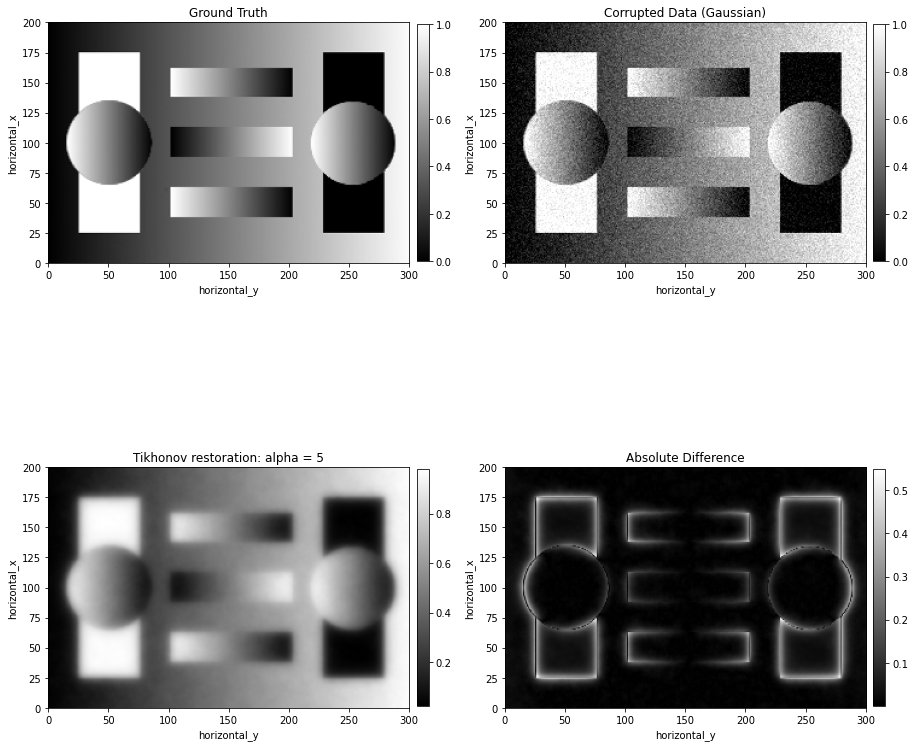

In [26]:
plotter2D([data, noisy_data, algo.solution, (algo.solution-data).abs()],
          titles=["Ground Truth", 
                  "Corrupted Data (Gaussian)", 
                  "Tikhonov restoration: alpha = {}".format(alpha),
                  "Absolute Difference"])